# Export and import from Foliage group by month and year

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import csv
import seaborn as sns

In [3]:
colors = ['#edd09e', '#1de286', '#5d680a', '#296d0a', '#02ede0', '#ad81d1', '#86afe8',
          '#69e234', '#cae01d', '#e894e3', '#0c633b', '#d6e088', '#e52bda', '#e01a8d',
          '#d18e91', '#63440d', '#560909', '#db8ab9', '#8b8c7e', '#86ceca', '#f2aa2e',
          '#f21515', '#f9acac', '#081156', '#700e12', '#ef1019', '#2075ea', '#390f5b',
          '#8de0b9', '#8823db', '#afe896', '#ba96ab', '#8e0286', '#8e0153']

index = 0
country_colors = {}

def return_color(name):
    global index
    if name in country_colors:
        return country_colors[name]
    country_colors[name] = colors[index]
    index += 1
    return country_colors[name]

### TITULO

In [4]:
filename_export = "data" + os.sep + "export" + os.sep + "all_export_with_group_and_label.txt"
filename_import = "data" + os.sep + "import" + os.sep + "all_import_with_group_and_label.txt"

usecols_export =  ["YEAR","TOTALVALORFOB", "CODIGOARANCEL", "GROUP"]
usecols_import =  ["YEAR", "CIF", "ARANC_NAC", "GROUP"]

data_import = pd.read_csv(filename_import, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols_import)

data_export = pd.read_csv(filename_export, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_export)
# concatenate data
data_export["TYPE"] = "Export"
data_import["TYPE"] = "Import"


data_export.columns = ['USD', "CODIGO", 'YEAR', "GROUP", "TYPE"]
data_import.columns = ['USD', "CODIGO", 'YEAR', "GROUP", "TYPE"]

final_data = pd.concat([data_import, data_export])

final_data = final_data[final_data["GROUP"] == "Foliage"]
final_data[["USD", 'CODIGO', "TYPE", "YEAR"]].groupby(['CODIGO', "TYPE", "YEAR"]).sum().unstack().replace(np.nan, 0)


USD                                      \
YEAR                       2012        2013        2014        2015   
CODIGO       TYPE                                                     
Dracaena sp. Import   251677.79   309735.20        0.00        0.00   
Others       Export  3399429.07  3807867.59  3600677.77  2805065.21   
             Import  3136457.73  2466835.97   730921.96  1071503.15   

                                             
YEAR                       2016        2017  
CODIGO       TYPE                            
Dracaena sp. Import        0.00        0.00  
Others       Export  2338840.45  1080626.52  
             Import  1585320.06   366394.87

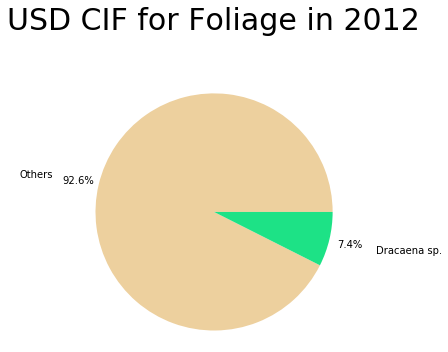

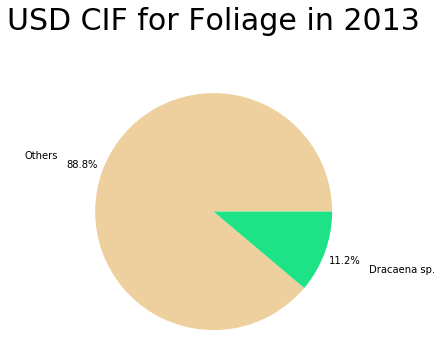

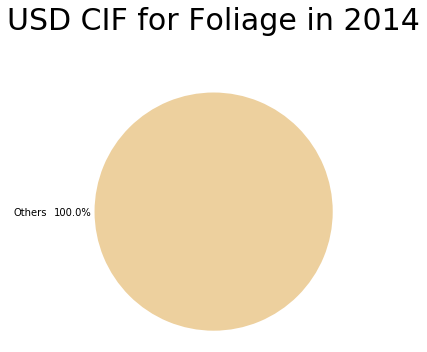

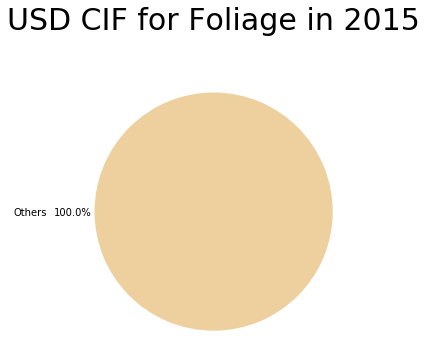

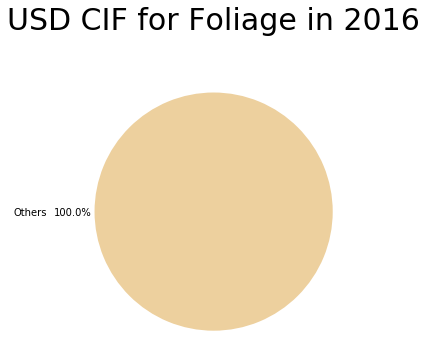

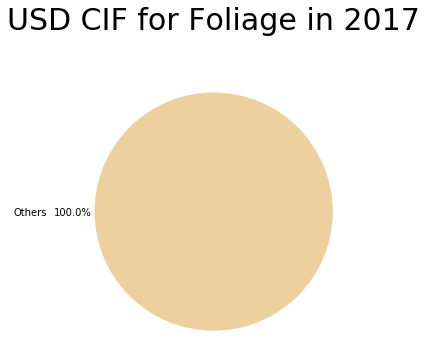

In [6]:
def define_country(row, total):
    if row[1] > 0.01*total:
        return row[0]
    return "Other Foliage"

filename = "data" + os.sep + "import" + os.sep + "all_import_with_group_and_label.txt"
usecols =  ["CIF", "ARANC_NAC", "YEAR", "GROUP"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)
 
for group in ["Foliage"]:
    new_data = data[data["GROUP"] == group]
        
    for year in range(2011, 2018):
        temporal_data = new_data[new_data["YEAR"] == year]
        
        if not temporal_data.empty:
            sums = temporal_data.groupby(['ARANC_NAC']).sum().reset_index()
            total = sums["CIF"].sum()

            sums['COUNTRY'] = sums.apply(lambda x: define_country(x, total), axis=1)

            aux = sums[["COUNTRY", "CIF"]].groupby("COUNTRY").sum()
            #slices = aux.sort_values()
            
            aux = aux.sort_values("CIF", ascending=False)
            
            
            plt.pie(aux,colors= [return_color(x) for x in aux.index],
                    autopct='%1.1f%%', pctdistance=1.18, labels = aux.index, 
                    labeldistance=1.4)
            

            # View the plot drop above
            plt.axis('equal')

            # View the plot
            plt.tight_layout()
            #plt.legend(aux.index, loc='upper right', bbox_to_anchor=(1.7, 1))
            
            plt.title("USD CIF for {} in {}".format(group, year), fontdict ={'fontsize': 30}, y=1.18)

            plt.savefig("USD CIF for {} in {}".format(group, year), bbox_inches='tight')
            plt.show()

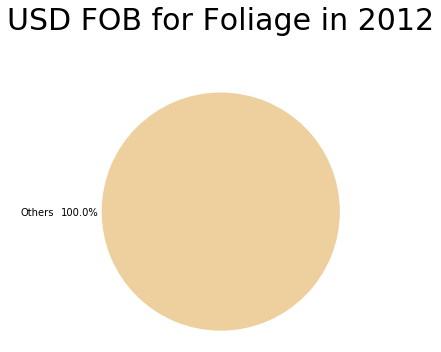

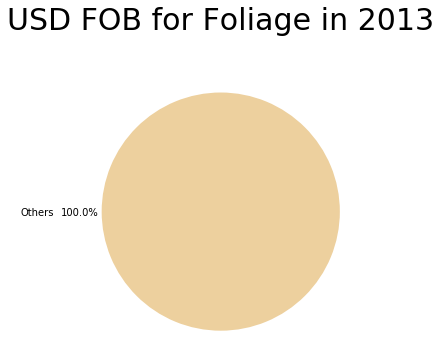

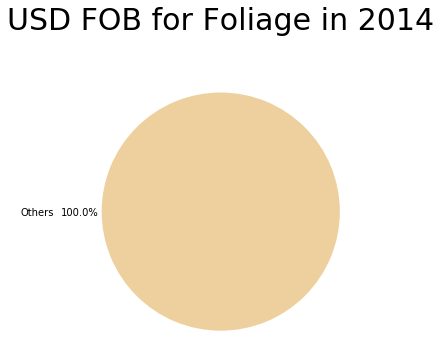

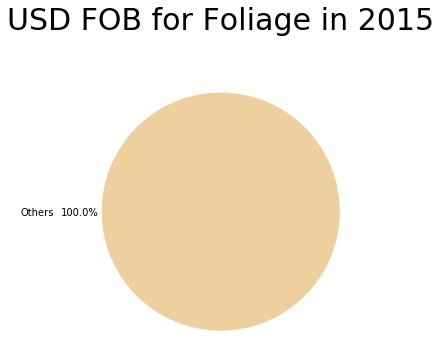

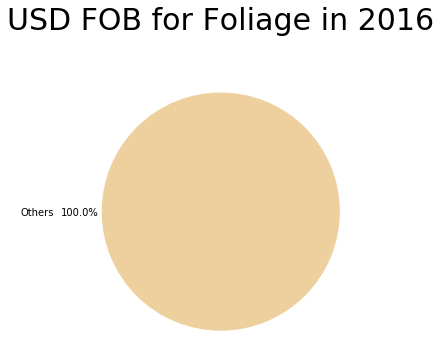

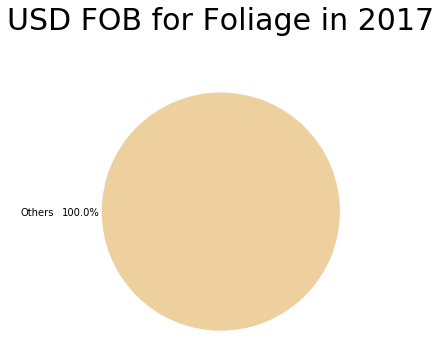

In [7]:
def define_country(row, total):
    if row[1] > 0.01*total:
        return row[0]
    return "Other Foliage"

filename = "data" + os.sep + "export" + os.sep + "all_export_with_group_and_label.txt"
usecols =  ["TOTALVALORFOB", "CODIGOARANCEL", "YEAR", "GROUP"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)
 
for group in ["Foliage"]:
    new_data = data[data["GROUP"] == group]
        
    for year in range(2011, 2018):
        temporal_data = new_data[new_data["YEAR"] == year]
        
        if not temporal_data.empty:
            sums = temporal_data.groupby(['CODIGOARANCEL']).sum().reset_index()
            total = sums["TOTALVALORFOB"].sum()

            sums['COUNTRY'] = sums.apply(lambda x: define_country(x, total), axis=1)

            aux = sums[["COUNTRY", "TOTALVALORFOB"]].groupby("COUNTRY").sum()
            #slices = aux.sort_values()
            
            aux = aux.sort_values("TOTALVALORFOB", ascending=False)
            
            
            plt.pie(aux,colors= [return_color(x) for x in aux.index],
                    autopct='%1.1f%%', pctdistance=1.18, labels = aux.index, 
                    labeldistance=1.4)
            

            # View the plot drop above
            plt.axis('equal')

            # View the plot
            plt.tight_layout()
            #plt.legend(aux.index, loc='upper right', bbox_to_anchor=(1.7, 1))
            
            plt.title("USD FOB for {} in {}".format(group, year), fontdict ={'fontsize': 30}, y=1.18)

            plt.savefig("USD FOB for {} in {}".format(group, year), bbox_inches='tight')
            plt.show()